In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../01.Data_Collection/films.csv')

print(df.shape)
df.sample()

(839, 34)


,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,배역명,영화코드,배우코드,주연배우,역할_배우,배우성별,작가,작가코드,대표작가,역할_시나리오(각본),작가성별,F-rated,감독코드,대표감독,역할_감독,감독성별
474,136.0,아기와 나,2017.11.23,"17,949,800",0.0%,"18,540,900","2,356","2,455",62,692,한국,한국,한국영화아카데미,CGV아트하우스,15세이상관람가,드라마,손태겸,"이이경,정연주,이승현,가심현,최초아,오희준,박명신,류경수,전신환,박순천",NaN,20160522.0,20124322.0,이이경,배우,남자,손태겸,20112723.0,손태겸,시나리오(각본),남자,0,20112723.0,손태겸,감독,남자


In [6]:
df.dtypes

순위             float64
영화명             object
개봉일             object
매출액             object
매출액점유율          object
누적매출액           object
관객수             object
누적관객수           object
스크린수            object
상영횟수            object
대표국적            object
국적              object
제작사             object
배급사             object
등급              object
장르              object
감독              object
배우              object
배역명             object
영화코드            object
배우코드           float64
주연배우            object
역할_배우           object
배우성별            object
작가              object
작가코드           float64
대표작가            object
역할_시나리오(각본)     object
작가성별            object
F-rated          int64
감독코드           float64
대표감독            object
역할_감독           object
감독성별            object
dtype: object

## merge 확인 부탁드려요

In [34]:
df.isnull().sum()

순위              31
영화명              0
영화코드             0
개봉일             31
매출액             31
매출액점유율          31
누적매출액           31
관객수             31
누적관객수           31
스크린수            31
상영횟수            31
대표국적            31
국적              31
제작사             51
배급사             32
등급              31
장르              31
F-rated          0
감독              34
대표감독            51
감독코드            51
감독성별            53
역할_감독           51
작가             169
대표작가           169
작가코드           169
작가성별           203
역할_시나리오(각본)    169
배우              62
주연배우            54
배우코드            59
배우성별            54
역할_배우           59
배역명            480
dtype: int64

In [35]:
df.tail()

,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,역할_감독,작가,대표작가,작가코드,작가성별,역할_시나리오(각본),배우,주연배우,배우코드,배우성별,역할_배우,배역명
834,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,김대성,20223386.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,김도영,20153842.0,여자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,반태경,20327772.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,신상민,20318581.0,여자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,조성규,10065915.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df[df['감독'].isnull()]

,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,역할_감독,작가,대표작가,작가코드,작가성별,역할_시나리오(각본),배우,주연배우,배우코드,배우성별,역할_배우,배역명
499,69.0,젝스키스 에이틴,20189525.0,2018-01-18,"364,405,500",0.0%,"364,405,500","50,419","50,419",25,774,한국,한국,(주)와이지엔터테인먼트,씨제이 씨지브이(CJ CGV)(주),전체관람가,다큐멘터리,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"은지원,이재진,장수원,김재덕,강성훈,이재진",은지원,10054654.0,남자,배우,NaN
658,84.0,트와이스랜드,20184529.0,2018-12-07,"153,765,000",0.0%,"153,765,000","18,252","18,252",53,572,한국,한국,(주)제이와이피엔터테인먼트,씨제이 씨지브이(CJ CGV)(주),전체관람가,다큐멘터리,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"나연,정연,모모,사나,지효,미나,다현,채영,쯔위",나연,10072145.0,여자,배우,NaN
676,35.0,러브 유어셀프 인 서울,20185124.0,2019-01-26,"3,209,682,900",0.4%,"3,209,682,900","342,366","342,366",224,"4,535",한국,한국,"빅히트 엔터테인먼트,씨제이 씨지브이(CJ CGV)(주)",씨제이 씨지브이(CJ CGV)(주),전체관람가,공연,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"김남준,김석진,민윤기,정호석,박지민,김태형,전정국",김남준,20311775.0,남자,배우,NaN
808,NaN,선종 무문관,20183144.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,윤용진,윤용진,20110475.0,남자,시나리오(각본),NaN,NaN,NaN,NaN,NaN,NaN
809,NaN,선종 무문관,20183144.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,김의곤,김의곤,20244869.0,남자,시나리오(각본),NaN,NaN,NaN,NaN,NaN,NaN
810,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,김태식,10006101.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,조조 히데오,10066963.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,전규환,10061231.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,최율권희,20216886.0,남자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,NaN,movieNm,movieCd,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,김소연,20222448.0,여자,감독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 컬럼 순서 재배열

In [21]:
len(df.columns)

34

In [20]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우', '배역명',
       '영화코드', '배우코드', '주연배우', '역할_배우', '배우성별', '작가', '작가코드', '대표작가',
       '역할_시나리오(각본)', '작가성별', 'F-rated', '감독코드', '대표감독', '역할_감독', '감독성별'],
      dtype='object')

In [23]:
column_list = ['순위', '영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', 
               '스크린수', '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', 'F-rated',
               '감독', '대표감독', '감독코드', '감독성별', '역할_감독',
               '작가', '대표작가', '작가코드', '작가성별', '역할_시나리오(각본)',
               '배우', '주연배우', '배우코드', '배우성별', '역할_배우', '배역명']
df = df[column_list]

In [24]:
df.head()

,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,역할_감독,작가,대표작가,작가코드,작가성별,역할_시나리오(각본),배우,주연배우,배우코드,배우성별,역할_배우,배역명
0,55.0,워킹걸,20147947.0,2015.1.7,"1,183,887,479",0.1%,"1,201,963,479","149,181","151,550",308,"7,076",한국,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,청소년관람불가,"코미디,멜로/로맨스",1,정범식,정범식,10061758.0,남자,감독,정범식,정범식,10061758.0,남자,시나리오(각본),"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",조여정,10066680.0,여자,배우,NaN
1,121.0,설해,20124398.0,2015.1.8,"20,767,500",0.0%,"29,770,500","2,796","3,933",34,335,한국,한국,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",12세이상관람가,"멜로/로맨스,드라마",0,김정권,김정권,10005546.0,남자,감독,"김정권, 김군영",김정권,10005546.0,남자,시나리오(각본),"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...",박해진,20126329.0,남자,배우,상우
2,26.0,허삼관,20131262.0,2015.1.14,"7,408,943,569",0.8%,"7,408,943,569","955,679","955,679",621,"27,645",한국,한국,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),12세이상관람가,드라마,0,하정우,하정우,10087253.0,남자,감독,"하정우, 김주호",하정우,10087253.0,남자,시나리오(각본),"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...",하정우,10087253.0,남자,배우,허삼관
3,16.0,오늘의 연애,20142407.0,2015.1.14,"14,924,654,487",1.7%,"14,924,654,487","1,891,993","1,891,993",709,"47,237",한국,한국,(주)팝콘에프앤엠,씨제이이앤엠(주),15세이상관람가,"멜로/로맨스,코미디",0,박진표,박진표,10029363.0,남자,감독,"박진표, 이병헌",박진표,10029363.0,남자,시나리오(각본),"이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...",이승기,10056227.0,남자,배우,NaN
4,149.0,꽃보다 처녀귀신,20155744.0,2015.1.15,"7,909,000",0.0%,"7,909,000","1,567","1,567",5,42,한국,한국,고구마콘텐츠허브(주),고구마콘텐츠허브(주),청소년관람불가,기타,0,최영민,최영민,10072470.0,남자,감독,윤영호,윤영호,10054419.0,남자,시나리오(각본),"안재민,이정민,이정민,박승찬,이현복,최경택,손지훈,우경희,유재훈,이돌,하혜정,한상민...",안재민,20204727.0,남자,배우,NaN


## 컬럼 간 상관관계

In [7]:
# corr 보기 위해 숫자로 표현된 컬럼만 남기기 + 식별을 위해 영화명, 영화코드 포함
df_in_digit = df[['영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수', 'F-rated']]
df_in_digit = df_in_digit[df_in_digit['개봉일'].notnull()]
print(df_in_digit.isnull().sum())
print(df_in_digit.shape)
df_in_digit.sample()

영화명        0
영화코드       0
개봉일        0
매출액        0
매출액점유율     0
누적매출액      0
관객수        0
누적관객수      0
스크린수       0
상영횟수       0
F-rated    0
dtype: int64
(808, 11)


,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated
479,실종2,20174199.0,2017.11.30,"11,252,500",0.0%,"11,252,500","1,513","1,513",29,271,1


In [8]:
# 컬럼 dtype 변경
# 매출액, 매출액점유율, 누적매출액, 관객수, 누적관객수, 스크린수, 상영횟수 -> int
columns = ['매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']

for c in columns:
    print(c)
    print(df_in_digit[c].dtype)
    if c == '매출액점유율': df_in_digit[c] = df_in_digit[c].apply(lambda x: float(x.replace('%','')))
    else:
        df_in_digit[c] = df_in_digit[c].apply(lambda x: int(x.replace(',', '').replace('%','')))
    
df_in_digit.dtypes

매출액
object
매출액점유율
object
누적매출액
object
관객수
object
누적관객수
object
스크린수
object
상영횟수
object


영화명         object
영화코드        object
개봉일         object
매출액          int64
매출액점유율     float64
누적매출액        int64
관객수          int64
누적관객수        int64
스크린수         int64
상영횟수         int64
F-rated      int64
dtype: object

In [9]:
df_in_digit['개봉일'] = pd.to_datetime(df_in_digit['개봉일'])
df_in_digit['year'] = pd.to_datetime(df_in_digit['개봉일']).dt.year
df_in_digit['month'] = pd.to_datetime(df_in_digit['개봉일']).dt.month
df_in_digit['day'] = pd.to_datetime(df_in_digit['개봉일']).dt.day
df_in_digit['dayofweek'] = pd.to_datetime(df_in_digit['개봉일']).dt.dayofweek

In [10]:
df_in_digit.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.997869,1.000000,0.999190,0.999192,0.776339,0.944985,-0.117557,0.013476,0.015759,-0.029194,-0.286490
매출액점유율,0.997869,1.000000,0.997875,0.995656,0.995667,0.772840,0.945209,-0.117623,0.025950,0.010284,-0.024255,-0.283503
누적매출액,1.000000,0.997875,1.000000,0.999187,0.999190,0.776384,0.945012,-0.117526,0.013537,0.015649,-0.029256,-0.286543
관객수,0.999190,0.995656,0.999187,1.000000,0.999999,0.775784,0.942876,-0.117042,0.003467,0.017222,-0.028603,-0.286909
누적관객수,0.999192,0.995667,0.999190,0.999999,1.000000,0.775841,0.942915,-0.116990,0.003546,0.017092,-0.028675,-0.286970
스크린수,0.776339,0.772840,0.776384,0.775784,0.775841,1.000000,0.876827,-0.121113,0.130484,-0.011587,-0.002000,-0.447734
상영횟수,0.944985,0.945209,0.945012,0.942876,0.942915,0.876827,1.000000,-0.113023,0.048943,-0.014570,-0.020723,-0.347923
F-rated,-0.117557,-0.117623,-0.117526,-0.117042,-0.116990,-0.121113,-0.113023,1.000000,0.047348,-0.006891,0.002593,0.054074
year,0.013476,0.025950,0.013537,0.003467,0.003546,0.130484,0.048943,0.047348,1.000000,-0.126272,0.030652,-0.158594
month,0.015759,0.010284,0.015649,0.017222,0.017092,-0.011587,-0.014570,-0.006891,-0.126272,1.000000,-0.055615,0.058097


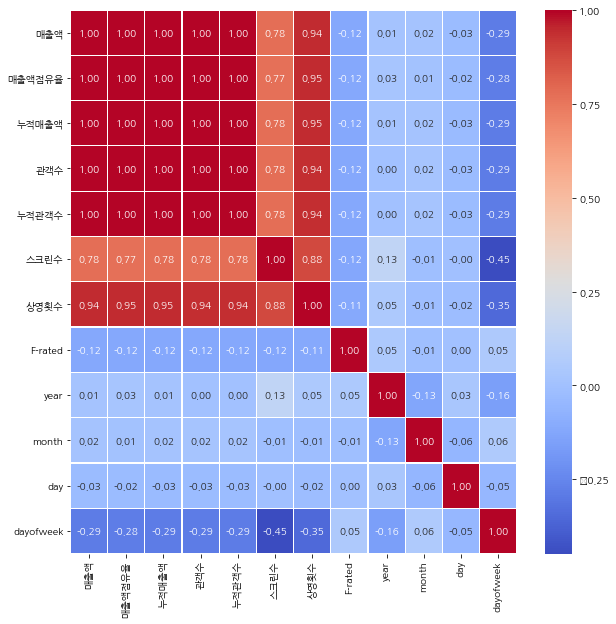

In [13]:
plt.figure(figsize=[10, 10])
sns.heatmap(df_in_digit.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

## 연도별 F-rating과 매출의 상관관계 보기 (재민 작업중)

In [25]:
df['개봉일'].dtype

dtype('O')

In [27]:
df['개봉일'].isnull().sum()

31

In [28]:
df['개봉일'] = pd.to_datetime(df['개봉일'])

In [29]:
df['개봉일'].dtype

dtype('<M8[ns]')